In [6]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FormatStrFormatter)
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.patches as mpatches

fstoau = 41.34137 # Femtosecond to a.u.
autocm1 = 219474.63 # a.u. (Hartree energy unit) to wavenumber
invfstocm1 = autocm1/fstoau #fs^-1 to cm^-1 conversion

In [7]:
specMD = np.loadtxt('MD.txt')
specTRPMD = np.loadtxt('TRPMD.txt')

dt = 1 * fstoau #Timestep
nplot = 350
dw = 2*np.pi / 2501 / dt * autocm1 #Frequency step for fft
wmin=0 #Minimin frequency
wmax=nplot*dw #Maximum frequency

In [8]:
#Plot settings:
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 'size': 8})
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage[helvet]{sfmath}')


cbarticks1 = [-0.3, -0.15, 0.0, 0.15, 0.3]
cbarticklabels1 = ['-0.30', '-0.15', '0.00', '0.15', '0.30']
cbarticks2 = [-0.15, -0.10, -0.05, 0.0, 0.05, 0.10, 0.15]
cbarticklabels2 = ['-0.15', '-0.10', '-0.05', '0.00', '0.05', '0.10', '0.15']

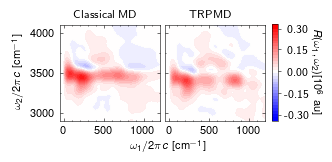

In [4]:
with mpl.style.context({
    'contour.negative_linestyle': 'solid',
    "contour.linewidth": 0.01,
    'axes.linewidth': 0.4,
    'xtick.major.size': 2.0,
    'xtick.major.width': 0.4,
    'xtick.minor.size': 1.0,
    'xtick.minor.width': 0.4,
    'ytick.major.size': 2.0,
    'ytick.major.width': 0.4,
    'ytick.minor.size': 1.0,
    'ytick.minor.width': 0.4
}):
    fig, axs = plt.subplots(1, 2, figsize=(3.3, 1.5),  gridspec_kw={'width_ratios': [0.445, 0.555]})

    for j in range(1):
        vmin=-0.31
        vmax=0.31
        levels = np.arange(vmin, vmax,0.02)
        for i in range(2):
            spec = [specMD, specTRPMD][i]
            ax = axs[i]
            cs = ax.contourf(spec,levels=levels, vmin=vmin, vmax=vmax,cmap=mpl.cm.bwr, extend='both', extent=(wmin,wmax,wmin,wmax))
            cs2 = ax.contour(spec,levels=levels, vmin=vmin, vmax=vmax,colors='tab:grey', alpha=0.4, extent=(wmin,wmax,wmin,wmax))
            ax.set_xlim([-50, 1200])
            ax.set_ylim([2900, 4100])
            ax.set_aspect('equal', adjustable='box')
            ax.set_title([r'Classical MD', r'TRPMD'][i], x = 0.45, y = 0.99, fontsize = 8)
            ax.xaxis.set_ticks_position('both')
            ax.yaxis.set_ticks_position('both')
            ax.tick_params(which='both', direction='in', labelleft = [True, False][i])
            ax.xaxis.set_major_locator(MultipleLocator(500))
            ax.xaxis.set_minor_locator(MultipleLocator(100))
            ax.yaxis.set_major_locator(MultipleLocator(500))
            ax.yaxis.set_minor_locator(MultipleLocator(250))
        cbar = fig.colorbar(cs, ax=ax, shrink = 0.65, location = 'right', aspect = 15, extendrect=True)
        cbar.add_lines(cs2)
        cbar.ax.set_ylabel(r'$R(\omega_1, \omega_2) [10^6 \ \rm au]$', labelpad = 10.5, rotation=270)
        cbar.set_ticks([cbarticks1, cbarticks2][j])
        cbar.set_ticklabels([cbarticklabels1, cbarticklabels2][j])
        for t in cbar.ax.get_yticklabels():
            t.set_horizontalalignment('right')
            t.set_x(4.5)

    plt.subplots_adjust(left=0.17,
                        bottom=0.03,
                        right=0.87,
                        top=1.02,
                        wspace=0.05,
                        hspace=-0.2)

    fig.text(0.02, 0.53, r'$\omega_2 / 2 \pi c\ [{\rm cm}^{-1}]$', va='center', rotation='vertical')
    fig.text(0.5, 0.015, r'$\omega_1 / 2 \pi c\ [{\rm cm}^{-1}]$', ha='center')

    plt.s

In [5]:
from svgutils.compose import *

#create new SVG figure
fig = Figure('300', '250',
    Panel(
        SVG('Scheme.svg').scale(0.97),
        Text("(a)", 5, 20, size=12)
        ), 
    Panel(
        SVG('plot.svg').scale(1.24),
        Text("(b)", 0, 10, size=12)
        ).move(5, 110)
    )

fig.save("2D_IR_Raman.svg")

#SVG file can be converted to PDF using Inkscape.

ModuleNotFoundError: No module named 'svgutils'